# Data frame:
## 2505215-MN5813 group 15
## bellow is the link to github, where the data frames and the final work ( without being affected by pdf convertion) are avalavle:
### https://github.com/parparito/2505215-MN5813.git

# Data Loading:

In [9]:
def print_task_card(title, description):
    
    box_width = 70
    padding = 2
    horizontal_line = "╭" + "─" * (box_width - 2) + "╮"
    title_line = f"│ {title.center(box_width - 4)} │"
    words = description.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= box_width - 4:
            current_line += (word + " ")
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    lines.append(current_line.strip())
    description_lines = [f"│ {line.ljust(box_width - 4)} │" for line in lines]
    print(horizontal_line)
    print(title_line)
    print("├" + "─" * (box_width - 2) + "┤")
    for line in description_lines:
        print(line)
    print("╰" + "─" * (box_width - 2) + "╯")
task_title = "1. Data Loading: Super Stretch Goal"
task_description = (
    "e.g., Create an HTML table from the data and load the data directly from the remote webpage." 
    "Display the first few rows and basic information about the DataFrame."
)
print_task_card(task_title, task_description)

╭────────────────────────────────────────────────────────────────────╮
│                1. Data Loading: Super Stretch Goal                 │
├────────────────────────────────────────────────────────────────────┤
│ e.g., Create an HTML table from the data and load the data         │
│ directly from the remote webpage.Display the first few rows and    │
│ basic information about the DataFrame.                             │
╰────────────────────────────────────────────────────────────────────╯


## 1. use the kaggle API key to download the dataframe from the remote website:

In [14]:
import os

# firs step is to define the path to the API file downloaded from kaggle.com
api_file_path = '/Users/parsaadineh/Desktop/last dance/kaggledata.json'

# next, is to makes sure the file exists before proceeding
if os.path.exists(api_file_path):
    print(f"The API file is ready for use at: {api_file_path}")
else:
    print("The specified API file does not exist. Please check the path.")

The API file is ready for use at: /Users/parsaadineh/Desktop/last dance/kaggledata.json


In [17]:
import os
api_file_path = '/Users/parsaadineh/Desktop/last dance/kaggledata.json'

os.chmod(api_file_path, 0o600)

print(f"Permissions for {api_file_path} have been set to 600 (read/write for owner only).")

Permissions for /Users/parsaadineh/Desktop/last dance/kaggledata.json have been set to 600 (read/write for owner only).


In [20]:
!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results

Dataset URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
License(s): CC0-1.0
 55%|█████████████████████                 | 3.00M/5.43M [00:00<00:00, 5.80MB/s]
100%|██████████████████████████████████████| 5.43M/5.43M [00:00<00:00, 7.97MB/s]


## 2. convert the format to create the HTML tables:

In [33]:
import os

# next step is to path to the dataset ZIP file that was just downloaded from kaggle using the API key
dataset_zip = '120-years-of-olympic-history-athletes-and-results.zip'

# Remove any privius files if it exists
if os.path.exists(dataset_zip):
    os.remove(dataset_zip)
    print(f"Removed existing file: {dataset_zip}")
else:
    print(f"No local copy found: {dataset_zip}")

Removed existing file: 120-years-of-olympic-history-athletes-and-results.zip


In [36]:
import zipfile
import os

# Path to the ZIP file
zip_path = '/Users/parsaadineh/kaggle_datasets/120-years-of-olympic-history-athletes-and-results.zip'
extract_path = '/Users/parsaadineh/Desktop/clean data base'

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted files to {extract_path}")

Extracted files to /Users/parsaadineh/Desktop/clean data base


In [39]:
# We vertefiy the data
print(os.listdir(extract_path))

['noc_regions.csv', 'athlete_events.csv']


### Preview the fitst view lins of code from each table:

In [44]:
import pandas as pd

# We first path to the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/athlete_events.csv'  # Update with the correct file name

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)       
display(df.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [47]:
import pandas as pd

file_path = '/Users/parsaadineh/Desktop/clean data base/noc_regions.csv'

df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        
display(df.head())  

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Data Cleaning:

In [52]:
def print_task_card(title, description):
    
    box_width = 70
    padding = 2
    horizontal_line = "╭" + "─" * (box_width - 2) + "╮"
    title_line = f"│ {title.center(box_width - 4)} │"
    words = description.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= box_width - 4:
            current_line += (word + " ")
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    lines.append(current_line.strip())
    description_lines = [f"│ {line.ljust(box_width - 4)} │" for line in lines]
    print(horizontal_line)
    print(title_line)
    print("├" + "─" * (box_width - 2) + "┤")
    for line in description_lines:
        print(line)
    print("╰" + "─" * (box_width - 2) + "╯")
task_title = "2. Data cleaning:"
task_description = (
    "1: Handle missing values in the dataset.,"
    "(i.e., check whether missing values -- NaN -- exist in the dataset and deal with them appropriately as we discussed in class)." 
    "2: Convert data types where necessary (e.g., ensure Year is in datetime format)." 
    "3: Remove any duplicate entries (if they exist)"
)
print_task_card(task_title, task_description)

╭────────────────────────────────────────────────────────────────────╮
│                         2. Data cleaning:                          │
├────────────────────────────────────────────────────────────────────┤
│ 1: Handle missing values in the dataset.,(i.e., check whether      │
│ missing values -- NaN -- exist in the dataset and deal with them   │
│ appropriately as we discussed in class).2: Convert data types      │
│ where necessary (e.g., ensure Year is in datetime format).3:       │
│ Remove any duplicate entries (if they exist)                       │
╰────────────────────────────────────────────────────────────────────╯


## 1: Merge the two tables

In [57]:
import pandas as pd

# Load the datasets
noc_regions = pd.read_csv('/Users/parsaadineh/Desktop/clean data base/noc_regions.csv')
athlete_events = pd.read_csv('/Users/parsaadineh/Desktop/clean data base/athlete_events.csv')

# Merge the datasets
merged_data = pd.merge(athlete_events, noc_regions, on='NOC', how='inner')  # Adjust 'how' as needed ('inner', 'left', 'right', 'outer')

# Save the merged dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/merged data.csv'
merged_data.to_csv(output_path, index=False)
print(f"\nMerged dataset saved to: {output_path}")

# Display the first few rows of the merged dataset 
print("\nPreview of the merged dataset:")
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        
display(merged_data.head()) 


Merged dataset saved to: /Users/parsaadineh/Desktop/clean data base/merged data.csv

Preview of the merged dataset:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## 2: Handle missing values in the dataset, Remove any duplicate, and fix data types

### replace missing ‘Medals’ values (NaN) with “none,” since not all participants win medals:

In [88]:
import pandas as pd

# We first load the merged dataset
merged_data_path = '/Users/parsaadineh/Desktop/clean data base/merged data.csv'
merged_data = pd.read_csv(merged_data_path)

# We Replace NaN values in the 'Medal' column with 'none', representing opamians who did not win any medales. 
if 'Medal' in merged_data.columns:
    print("Missing values in 'Medal' column before replacement:")
    print(merged_data['Medal'].isnull().sum())

    
    merged_data['Medal'] = merged_data['Medal'].fillna('none')

    print("\nMissing values in 'Medal' column after replacement:")
    print(merged_data['Medal'].isnull().sum())
else:
    print("'Medal' column does not exist in the dataset.")

# We save the updated dataset
cleaned_data_path = '/Users/parsaadineh/Desktop/clean data base/cleaned medal data.csv'
merged_data.to_csv(cleaned_data_path, index=False)
print(f"\nUpdated dataset with cleaned 'Medal' column saved to: {cleaned_data_path}")

# Preview the changes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nPreview of dataset with cleaned 'Medal' column:")
display(merged_data.head())

Missing values in 'Medal' column before replacement:
230993

Missing values in 'Medal' column after replacement:
0

Updated dataset with cleaned 'Medal' column saved to: /Users/parsaadineh/Desktop/clean data base/cleaned medal data.csv

Preview of dataset with cleaned 'Medal' column:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,none,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,none,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,none,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none,Netherlands,NaN


### Merge duplicate players who have won multiple medals and add a ‘Medal Count’ column.

In [94]:
import pandas as pd

# Load the merged dataset
merged_data_path = '/Users/parsaadineh/Desktop/clean data base/cleaned medal data.csv'
merged_data = pd.read_csv(merged_data_path)

merged_data['Medal'] = merged_data['Medal'].fillna('DNW')

# We remove the duplications and Create the "Medal count" column by grouping and counting medals.  
# This way, olampians who have won more than one medal, would show up onder the same row:
medal_count = (
    merged_data[merged_data['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
    .groupby('Name')['Medal']
    .count()
    .reset_index()
    .rename(columns={'Medal': 'Medal count'})
)

# Merge the medal count back into the original data
merged_data_with_counts = merged_data.merge(medal_count, on='Name', how='left')

# Fill missing values in the "Medal count" column with 0
merged_data_with_counts['Medal count'] = merged_data_with_counts['Medal count'].fillna(0).astype(int)

# Save the updated dataset
cleaned_data_path = '/Users/parsaadineh/Desktop/clean data base/medal count data.csv'
merged_data_with_counts.to_csv(cleaned_data_path, index=False)
print(f"Dataset with 'Medal count' column saved to: {cleaned_data_path}")

# Preview the updated dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nPreview of dataset with 'Medal count':")
display(merged_data_with_counts.head())

Dataset with 'Medal count' column saved to: /Users/parsaadineh/Desktop/clean data base/medal count data.csv

Preview of dataset with 'Medal count':


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Medal count
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,none,China,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,none,China,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,none,Denmark,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none,Netherlands,NaN,0


### Replace ‘none’ with ‘DNW’ (Did Not Win) and allow repetition, as players can win or lose multiple times.

In [106]:
import pandas as pd

# load the new dataset 
file_path = '/Users/parsaadineh/Desktop/clean data base/medal count data.csv'
data = pd.read_csv(file_path)

# Rename 'Medal' column to 'Appearances'
data = data.rename(columns={'Medal': 'Appearances'})

# Group rows by 'Name' and aggregate 'Appearances' with repetition allowed
data = data.groupby('Name').agg({
    'Sex': 'first',
    'Age': 'first',
    'Height': 'first',
    'Weight': 'first',
    'Team': 'first',
    'NOC': 'first',
    'Games': lambda x: ', '.join(sorted(set(x))),  # Combine unique Games
    'Year': lambda x: ', '.join(map(str, sorted(set(x)))),  # Combine unique Years
    'Season': lambda x: ', '.join(sorted(set(x))),  # Combine unique Seasons
    'City': lambda x: ', '.join(sorted(set(x))),  # Combine unique Cities
    'Sport': lambda x: ', '.join(sorted(set(x))),  # Combine unique Sports
    'Event': lambda x: ', '.join(sorted(set(x))),  # Combine unique Events
    'Appearances': lambda x: ', '.join(x),  # Concatenate all appearances (with repetition)
    'region': 'first',
    'notes': 'first'
}).reset_index()

# Calculate 'Adjusted Medal count'
data['Medal count'] = data['Appearances'].apply(
    lambda x: sum(1 for medal in x.split(', ') if medal.strip() in ['Gold', 'Silver', 'Bronze'])
)

# Save the updated dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/appearances adjusted medals data.csv'
data.to_csv(output_path, index=False)

# Display the first few rows of the updated dataset
print("Dataset with 'Appearances' and 'Adjusted Medal count':")
display(data.head())

Dataset with 'Appearances' and 'Adjusted Medal count':


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Appearances,region,notes,Medal count
0,"Gabrielle Marie ""Gabby"" Adcock (White-)",F,25.0,167.0,NaN,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,none,UK,None,0
1,Eleonora Margarida Josephina Scmitt,F,16.0,NaN,NaN,Brazil,BRA,1948 Summer,1948,Summer,London,Swimming,"Swimming Women's 100 metres Freestyle, Swimmin...","none, none",Brazil,None,0
2,Jean Hauptmanns,M,26.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",none,Germany,None,0
3,Luis ngel Fernando de los Santos Grossi,M,23.0,NaN,NaN,Uruguay,URU,"1948 Summer, 1952 Summer","1948, 1952",Summer,"Helsinki, London",Cycling,"Cycling Men's 1,000 metres Time Trial, Cycling...","none, none, none, none, none",Uruguay,None,0
4,Th Anh,F,20.0,165.0,58.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Foil, Individual",none,Vietnam,None,0


### Check for missing data

In [119]:
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/appearances adjusted medals data.csv'
df = pd.read_csv(file_path)

# Calculate NaN counts
nan_counts = df.isnull().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

# Calculate total non-NaN counts
total_counts = df.count().reset_index()
total_counts.columns = ['Column', 'Total Non-NaN Count']

# Merge the two tables to include both NaN and total counts
merged_counts = nan_counts.merge(total_counts, on='Column', how='left')

# Add a Total Value Count column (Total Non-NaN + NaN Count)
merged_counts['Total Value Count'] = merged_counts['NaN Count'] + merged_counts['Total Non-NaN Count']

merged_counts = merged_counts[['Column', 'NaN Count', 'Total Value Count', 'Total Non-NaN Count']]

# Display the final table
styled_table = merged_counts.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f2f2f2'), ('border', '1px solid black'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center')]}
]).set_properties(**{'border': '1px solid black', 'text-align': 'center'})

print("\nTable showing NaN values, Total Value Count, and Total Non-NaN Count:\n")
display(styled_table)


Table showing NaN values, Total Value Count, and Total Non-NaN Count:



,Column,NaN Count,Total Value Count,Total Non-NaN Count
0,Name,0,134566,134566
1,Sex,0,134566,134566
2,Age,6289,134566,128277
3,Height,33574,134566,100992
4,Weight,34544,134566,100022
5,Team,0,134566,134566
6,NOC,0,134566,134566
7,Games,0,134566,134566
8,Year,0,134566,134566
9,Season,0,134566,134566


### Remove the remaining NaN values, as they are minimal and won’t affect the analysis.

In [127]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/appearances adjusted medals data.csv'
df = pd.read_csv(file_path)

# Remove rows with NaN values in 'Height', 'Weight', and 'region'
columns_to_check = ['Height', 'Weight', 'region']
df_cleaned = df.dropna(subset=columns_to_check)

# Save the cleaned dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/cleaned data no nan.csv'
df_cleaned.to_csv(output_path, index=False)

In [131]:
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/cleaned data no nan.csv'
df = pd.read_csv(file_path)

# We calculate NaN counts
nan_counts = df.isnull().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

# Calculate total non-NaN counts
total_counts = df.count().reset_index()
total_counts.columns = ['Column', 'Total Non-NaN Count']

# Merge the two tables 
merged_counts = nan_counts.merge(total_counts, on='Column', how='left')

# Add a Total Value Count column
merged_counts['Total Value Count'] = merged_counts['NaN Count'] + merged_counts['Total Non-NaN Count']

merged_counts = merged_counts[['Column', 'NaN Count', 'Total Value Count', 'Total Non-NaN Count']]

# Display the final table
styled_table = merged_counts.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f2f2f2'), ('border', '1px solid black'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center')]}
]).set_properties(**{'border': '1px solid black', 'text-align': 'center'})

print("\nTable showing NaN values, Total Value Count, and Total Non-NaN Count:\n")
display(styled_table)


Table showing NaN values, Total Value Count, and Total Non-NaN Count:



,Column,NaN Count,Total Value Count,Total Non-NaN Count
0,Name,0,98927,98927
1,Sex,0,98927,98927
2,Age,494,98927,98433
3,Height,0,98927,98927
4,Weight,0,98927,98927
5,Team,0,98927,98927
6,NOC,0,98927,98927
7,Games,0,98927,98927
8,Year,0,98927,98927
9,Season,0,98927,98927


### After inspecting the HTML dataframe, we find that the remaining slots in the ‘Age’ column have no values, which is why they were not removed when deleting rows with NaN values. To adress this, we delete empty rows in the ‘Age’ column and remove the ‘Notes’ column, as it’s irrelevant to the analysis.

In [141]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/cleaned data no nan.csv'
df = pd.read_csv(file_path)

# Remove rows with NaN values in 'Height', 'Weight', 'region', and 'Age'
columns_to_check = ['Height', 'Weight', 'region', 'Age']
df_cleaned = df.dropna(subset=columns_to_check)

# Save the cleaned dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/fully cleaned data.csv'
df_cleaned.to_csv(output_path, index=False)


In [144]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/fully cleaned data.csv'
df = pd.read_csv(file_path)

# Remove the 'notes' column
if 'notes' in df.columns:
    df = df.drop(columns=['notes'])
    print("The 'notes' column has been removed.")

# Save the updated dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/data no notes.csv'
df.to_csv(output_path, index=False)


The 'notes' column has been removed.


In [147]:
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data no notes.csv'
df = pd.read_csv(file_path)

# Calculate NaN counts
nan_counts = df.isnull().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

# Calculate total non-NaN counts
total_counts = df.count().reset_index()
total_counts.columns = ['Column', 'Total Non-NaN Count']

# Merge the two tables
merged_counts = nan_counts.merge(total_counts, on='Column', how='left')

# Add a Total Value Count column 
merged_counts['Total Value Count'] = merged_counts['NaN Count'] + merged_counts['Total Non-NaN Count']

merged_counts = merged_counts[['Column', 'NaN Count', 'Total Value Count', 'Total Non-NaN Count']]

# Display the final table
styled_table = merged_counts.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f2f2f2'), ('border', '1px solid black'), ('font-weight', 'bold')]},
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center')]}
]).set_properties(**{'border': '1px solid black', 'text-align': 'center'})

print("\nTable showing NaN values, Total Value Count, and Total Non-NaN Count:\n")
display(styled_table)


Table showing NaN values, Total Value Count, and Total Non-NaN Count:



,Column,NaN Count,Total Value Count,Total Non-NaN Count
0,Name,0,98433,98433
1,Sex,0,98433,98433
2,Age,0,98433,98433
3,Height,0,98433,98433
4,Weight,0,98433,98433
5,Team,0,98433,98433
6,NOC,0,98433,98433
7,Games,0,98433,98433
8,Year,0,98433,98433
9,Season,0,98433,98433


# Data Wrangling:

In [151]:
def print_task_card(title, description):
    
    box_width = 70
    padding = 2
    horizontal_line = "╭" + "─" * (box_width - 2) + "╮"
    title_line = f"│ {title.center(box_width - 4)} │"
    words = description.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= box_width - 4:
            current_line += (word + " ")
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    lines.append(current_line.strip())
    description_lines = [f"│ {line.ljust(box_width - 4)} │" for line in lines]
    print(horizontal_line)
    print(title_line)
    print("├" + "─" * (box_width - 2) + "┤")
    for line in description_lines:
        print(line)
    print("╰" + "─" * (box_width - 2) + "╯")
task_title = "3. Data wrangling:"
task_description = (
    "1 :Create a new column Age_Group that categorises athletes into age groups (e.g., 0-18, 19-25, 26-35, 36+, but the choice is yours). " 
    "2 :Combine Given_Name and Family_Name into a single Full_Name column. "
    "3 : extract the century from the Year column and create a new Century column. " 
)
print_task_card(task_title, task_description)

╭────────────────────────────────────────────────────────────────────╮
│                         3. Data wrangling:                         │
├────────────────────────────────────────────────────────────────────┤
│ 1 :Create a new column Age_Group that categorises athletes into    │
│ age groups (e.g., 0-18, 19-25, 26-35, 36+, but the choice is       │
│ yours). 2 :Combine Given_Name and Family_Name into a single        │
│ Full_Name column. 3 : extract the century from the Year column     │
│ and create a new Century column.                                   │
╰────────────────────────────────────────────────────────────────────╯


## 1. Create age groups and add the column to the data frame:

In [158]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data no notes.csv'
df = pd.read_csv(file_path)

# Define age group bins and labels
bins = [0, 18, 25, 35, float('inf')]  # Adjust ranges as needed
labels = ['0-18', '19-25', '26-35', '36+']

# Create the Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the dataset
print("\nPreview of the dataset with the 'Age_Group' column:")
display(df.head())


Preview of the dataset with the 'Age_Group' column:


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Appearances,region,Medal count,Age_Group
0,Th Anh,F,20.0,165.0,58.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Foil, Individual",none,Vietnam,0,19-25
1,Th Ngn Thng,F,19.0,147.0,47.0,Vietnam,VIE,"2008 Summer, 2012 Summer","2008, 2012",Summer,"Beijing, London",Gymnastics,"Gymnastics Women's Balance Beam, Gymnastics Wo...","none, none, none, none, none, none, none",Vietnam,0,19-25
2,Tin Tun,M,21.0,173.0,63.0,Vietnam,VIE,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,none,Vietnam,0,19-25
3,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,none,China,0,19-25
4,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,none,China,0,19-25


### the first name and last name were already combined in the data frame downloaded so no need to merge the columns but if they weren't this is how it would be done :

import pandas as pd  

### Load the dataset
file_path = '/Users/parsaadineh/Desktop/new data base/data_no_notes.csv'
df = pd.read_csv(file_path)

### Combine Given_Name and Family_Name into Full_Name
if 'Given_Name' in df.columns and 'Family_Name' in df.columns:
    df['Full_Name'] = df['Given_Name'] + ' ' + df['Family_Name']
    print("The 'Full_Name' column has been created.")
else:
    print("One or both of the columns 'Given_Name' and 'Family_Name' are missing.")

### Remove the original columns

df = df.drop(columns=['Given_Name', 'Family_Name'])

### Save the updated dataset
output_path = '/Users/parsaadineh/Desktop/new data base/data_with_full_name.csv'
df.to_csv(output_path, index=False)

## 2. Change the "Name" column to "Full name" 

In [165]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data no notes.csv'
df = pd.read_csv(file_path)

# Rename the 'Name' column to 'Full_Name'
if 'Name' in df.columns:
    df = df.rename(columns={'Name': 'Full_Name'})
    print("The 'Name' column has been renamed to 'Full_Name'.")
else:
    print("The 'Name' column does not exist in the dataset.")

# Save the updated dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/data no notes.csv'
df.to_csv(output_path, index=False)

# Display the first few rows of the updated dataset
print("\nPreview of the dataset with the renamed 'Full_Name' column:")
display(df.head())

The 'Name' column has been renamed to 'Full_Name'.

Preview of the dataset with the renamed 'Full_Name' column:


,Full_Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Appearances,region,Medal count
0,Th Anh,F,20.0,165.0,58.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Foil, Individual",none,Vietnam,0
1,Th Ngn Thng,F,19.0,147.0,47.0,Vietnam,VIE,"2008 Summer, 2012 Summer","2008, 2012",Summer,"Beijing, London",Gymnastics,"Gymnastics Women's Balance Beam, Gymnastics Wo...","none, none, none, none, none, none, none",Vietnam,0
2,Tin Tun,M,21.0,173.0,63.0,Vietnam,VIE,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,none,Vietnam,0
3,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,none,China,0
4,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,none,China,0


## 3. adding the centuries column

In [171]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data no notes.csv'
df = pd.read_csv(file_path)

# Ensure 'Year' column exists
if 'Year' in df.columns:
    # We handle multiple years in the 'Year' column
    def years_to_centuries(years):
        try:
            # We split multiple years, convert to integers, calculate centuries, and join back
            return ', '.join(
                str((int(year) // 100) + 1) for year in years.split(', ') if year.isdigit()
            )
        except Exception as e:
            return None  # We handle invalid entries gracefully
    
    # We apply the function to the 'Year' column
    df['Century'] = df['Year'].apply(years_to_centuries)
    print("The 'Century' column has been created.")
else:
    print("The 'Year' column does not exist in the dataset.")

# Save the updated dataset
output_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv'
df.to_csv(output_path, index=False)

# Display the first few rows of the updated dataset
print("\nPreview of the dataset with the 'Century' column:")
display(df[['Year', 'Century']].head())

The 'Century' column has been created.

Preview of the dataset with the 'Century' column:


,Year,Century
0,2016,21
1,"2008, 2012","21, 21"
2,1988,20
3,1992,20
4,2012,21


## making sure the dataframe looks right:

In [174]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv'
df = pd.read_csv(file_path)

# Display the entire DataFrame
print("\nPreview of the entire dataset:")
display(df)


Preview of the entire dataset:


,Full_Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Appearances,region,Medal count,Century
0,Th Anh,F,20.0,165.0,58.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Foil, Individual",none,Vietnam,0,21
1,Th Ngn Thng,F,19.0,147.0,47.0,Vietnam,VIE,"2008 Summer, 2012 Summer","2008, 2012",Summer,"Beijing, London",Gymnastics,"Gymnastics Women's Balance Beam, Gymnastics Wo...","none, none, none, none, none, none, none",Vietnam,0,"21, 21"
2,Tin Tun,M,21.0,173.0,63.0,Vietnam,VIE,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,none,Vietnam,0,20
3,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,none,China,0,20
4,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,none,China,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98428,zge Krdar emberci,F,27.0,183.0,70.0,Turkey,TUR,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,none,Turkey,0,21
98429,zlem Kaya,F,22.0,165.0,47.0,Turkey,TUR,"2012 Summer, 2016 Summer","2012, 2016",Summer,"London, Rio de Janeiro",Athletics,"Athletics Women's 3,000 metres Steeplechase","none, none",Turkey,0,"21, 21"
98430,zman Graud,M,33.0,168.0,72.0,Turkey,TUR,1972 Summer,1972,Summer,Munich,Shooting,Shooting Mixed Skeet,none,Turkey,0,20
98431,zzet Safer,M,26.0,178.0,74.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,none,Turkey,0,21


# Data Analysis

In [179]:
def print_task_card(title, description):
    
    box_width = 70
    padding = 2
    horizontal_line = "╭" + "─" * (box_width - 2) + "╮"
    title_line = f"│ {title.center(box_width - 4)} │"
    words = description.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= box_width - 4:
            current_line += (word + " ")
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    lines.append(current_line.strip())
    description_lines = [f"│ {line.ljust(box_width - 4)} │" for line in lines]
    print(horizontal_line)
    print(title_line)
    print("├" + "─" * (box_width - 2) + "┤")
    for line in description_lines:
        print(line)
    print("╰" + "─" * (box_width - 2) + "╯")
task_title = "4. Data Analysis:"
task_description = (
    "1: Calculate the average age of athletes for each Olympic event." 
    "2: Determine the top 10 countries with the most gold medals."
    "3: Find the athlete with the most medals in each sport" 
)
print_task_card(task_title, task_description)

╭────────────────────────────────────────────────────────────────────╮
│                         4. Data Analysis:                          │
├────────────────────────────────────────────────────────────────────┤
│ 1: Calculate the average age of athletes for each Olympic          │
│ event.2: Determine the top 10 countries with the most gold         │
│ medals.3: Find the athlete with the most medals in each sport      │
╰────────────────────────────────────────────────────────────────────╯


## 1. We calculate the avrage age:

### by Sport:

In [186]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv'
df = pd.read_csv(file_path)

if 'Age' in df.columns and 'Sport' in df.columns:
    
    df_cleaned = df.dropna(subset=['Age', 'Sport'])
    
    # Group by 'Sport' and calculate the average age
    avg_age_by_sport = df_cleaned.groupby('Sport')['Age'].mean().reset_index()
    avg_age_by_sport.columns = ['Sport', 'Average Age']
    
    # Round the average age to two decimal points
    avg_age_by_sport['Average Age'] = avg_age_by_sport['Average Age'].round(2)
    
    # Sort by Average Age
    avg_age_by_sport = avg_age_by_sport.sort_values(by='Average Age', ascending=False)

    # Save the results to a new CSV file
    output_path = '/Users/parsaadineh/Desktop/clean data base/average age.csv'
    avg_age_by_sport.to_csv(output_path, index=False)
    
    # Display the results
    print("\nAverage Age by Sport:")
    display(avg_age_by_sport)
else:
    print("The 'Age' or 'Sport' column is missing in the dataset.")


Average Age by Sport:


,Sport,Average Age
42,"Art Competitions, Swimming",43.0
33,Art Competitions,42.0
44,"Art Competitions, Volleyball",42.0
40,"Art Competitions, Rowing",39.0
38,"Art Competitions, Fencing",39.0
...,...,...
342,"Gymnastics, Rhythmic Gymnastics",15.0
410,"Rhythmic Gymnastics, Swimming",15.0
316,"Figure Skating, Freestyle Skiing",15.0
287,"Diving, Volleyball",14.0


### by Event:

In [189]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Ensure the 'Age' and 'Event' columns exist
if 'Age' in df.columns and 'Event' in df.columns:
    # Drop rows with missing values in 'Age' or 'Event'
    df_cleaned = df.dropna(subset=['Age', 'Event'])
    
    # Group by 'Event' and calculate the average age
    avg_age_by_event = df_cleaned.groupby('Event')['Age'].mean().reset_index()
    avg_age_by_event.columns = ['Event', 'Average Age']
    
    # Round the average age to two decimal points
    avg_age_by_event['Average Age'] = avg_age_by_event['Average Age'].round(2)
    
    # Sort by Average Age 
    avg_age_by_event = avg_age_by_event.sort_values(by='Average Age', ascending=False)

    # Save the results to a new CSV file
    output_path = '/Users/parsaadineh/Desktop/clean data base/average age by event.csv'
    avg_age_by_event.to_csv(output_path, index=False)
    
    # Display the results
    print("\nAverage Age by Olympic Event:")
    display(avg_age_by_event)
else:
    print("The 'Age' or 'Event' column is missing in the dataset.")


Average Age by Olympic Event:


,Event,Average Age
129,"Art Competitions Mixed Sculpturing, Unknown Ev...",58.0
120,Art Competitions Mixed Music,55.0
128,"Art Competitions Mixed Sculpturing, Unknown Event",53.0
959,"Basketball Men's Basketball, Equestrianism Mix...",52.0
2915,"Shooting Mixed Rapid-Fire Pistol, 25 metres, S...",50.0
...,...,...
3669,"Swimming Women's 100 metres Backstroke, Swimmi...",13.0
3925,"Swimming Women's 200 metres Backstroke, Swimmi...",13.0
3731,"Swimming Women's 100 metres Breaststroke, Swim...",13.0
4039,Swimming Women's 4 x 100 metres Freestyle Rela...,12.0


## 2. Calculating the top 10 countries with the most gold medals:

In [200]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv' 
df = pd.read_csv(file_path)

if 'Appearances' in df.columns and 'NOC' in df.columns:
    # We define a function to count gold medals in Appearances
    def count_gold(appearances):
        if pd.notnull(appearances):
            # Split appearances and count "Gold" only
            return appearances.split(', ').count('Gold')
        return 0

    # Step 2: Create a Gold Count column
    df['Gold Count'] = df['Appearances'].apply(count_gold)

    # Step 3: Group by NOC and sum up the Gold Count
    gold_by_country = df.groupby('NOC', as_index=False)['Gold Count'].sum()

    # Step 4: Sort by Gold Count and select the top 10
    top_10_countries = gold_by_country.sort_values(by='Gold Count', ascending=False).head(10)

    # Display the results
    print("\nTop 10 Countries with the Most Gold Medals:")
    display(top_10_countries)

    # Save the results to a CSV file
    output_path = '/Users/parsaadineh/Desktop/clean data base/top 10 gold medals.csv'
    top_10_countries.to_csv(output_path, index=False)
else:
    print("The 'Appearances' or 'NOC' column is missing in the dataset.")


Top 10 Countries with the Most Gold Medals:


,NOC,Gold Count
209,USA,2116
207,URS,1039
77,GER,492
74,GDR,434
35,CAN,360
40,CHN,350
72,GBR,333
12,AUS,319
167,RUS,319
98,ITA,318


## 3. Athlete with the Most Medals in Each Sport:

In [206]:
import pandas as pd

# Load the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv'
df = pd.read_csv(file_path)

if 'Appearances' in df.columns and 'Sport' in df.columns and 'Full_Name' in df.columns:
    # We define a function to count medals (Gold, Silver, Bronze)
    def count_medals(appearances):
        if pd.notnull(appearances):
            items = appearances.split(', ')
            return items.count('Gold') + items.count('Silver') + items.count('Bronze')
        return 0

    # We calculate the total medals for each athlete
    df['Total Medals'] = df['Appearances'].apply(count_medals)

    # We group by Sport and Athlete, summing Total Medals
    medals_by_athlete = df.groupby(['Sport', 'Full_Name'], as_index=False)['Total Medals'].sum()

    # We find the athlete with the most medals in each sport
    top_athlete_by_sport = medals_by_athlete.loc[medals_by_athlete.groupby('Sport')['Total Medals'].idxmax()]

    # Sort the results by Sport
    top_athlete_by_sport = top_athlete_by_sport.sort_values(by='Sport')

    # Display the results
    print("\nAthlete with the Most Medals in Each Sport:")
    display(top_athlete_by_sport)

    # Save the results to a CSV file
    output_path = '/Users/parsaadineh/Desktop/clean data base/top athlete by sport.csv'
    top_athlete_by_sport.to_csv(output_path, index=False)
else:
    print("The 'Appearances', 'Sport', or 'Full_Name' column is missing in the dataset.")


Athlete with the Most Medals in Each Sport:


,Sport,Full_Name,Total Medals
904,Alpine Skiing,Kjetil Andr Aamodt,8
1726,"Alpine Skiing, Athletics",Chirine Njeim,0
1728,"Alpine Skiing, Athletics, Baseball",Li Lei,0
1729,"Alpine Skiing, Boxing",Carlos Alberto Martnez,0
1731,"Alpine Skiing, Boxing, Gymnastics, Ice Hockey",Peter Mller,3
...,...,...,...
93004,"Water Polo, Weightlifting",Anthony Martin,0
93006,"Water Polo, Wrestling",Biser Georgiev,0
94332,Weightlifting,Nikolaj Pealov,4
95041,"Weightlifting, Wrestling",Georgi Markov,2


# Data Visualisation:

In [216]:
def print_task_card(title, description):
    
    box_width = 70
    padding = 2
    horizontal_line = "╭" + "─" * (box_width - 2) + "╮"
    title_line = f"│ {title.center(box_width - 4)} │"
    words = description.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= box_width - 4:
            current_line += (word + " ")
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    lines.append(current_line.strip())
    description_lines = [f"│ {line.ljust(box_width - 4)} │" for line in lines]
    print(horizontal_line)
    print(title_line)
    print("├" + "─" * (box_width - 2) + "┤")
    for line in description_lines:
        print(line)
    print("╰" + "─" * (box_width - 2) + "╯")
task_title = "4. Data Visualisation:"
task_description = (
    "1: Create at least two meaningful visualisations using the cleaned and wrangled data" 
)
print_task_card(task_title, task_description)

╭────────────────────────────────────────────────────────────────────╮
│                       4. Data Visualisation:                       │
├────────────────────────────────────────────────────────────────────┤
│ 1: Create at least two meaningful visualisations using the         │
│ cleaned and wrangled data                                          │
╰────────────────────────────────────────────────────────────────────╯


## 1. we compare the sucsess of USSR to Russia

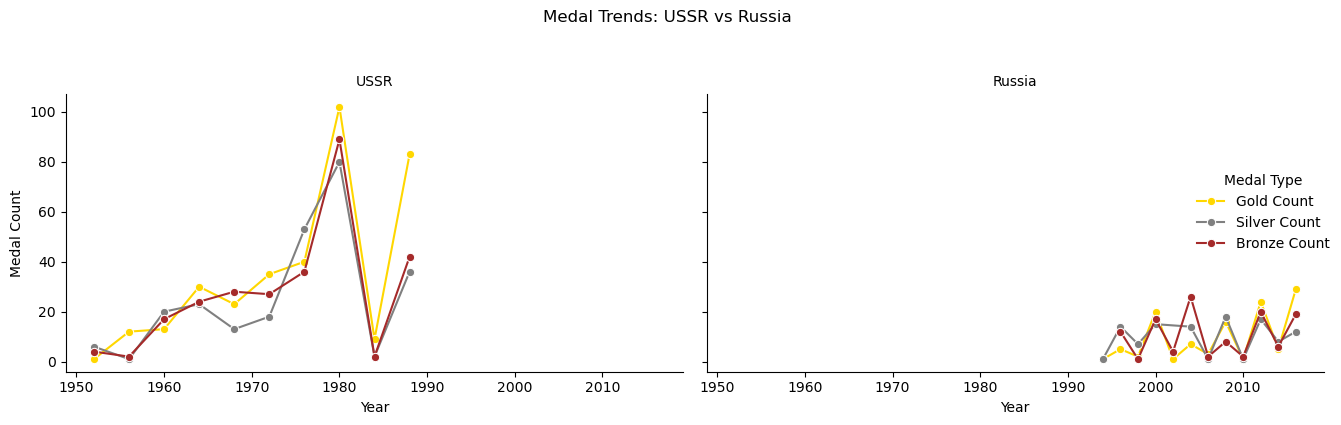

In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
file_path = '/Users/parsaadineh/Desktop/new data base/data_with_centuries_full.csv'
df = pd.read_csv(file_path)

# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])  # Remove rows with invalid years
df['Year'] = df['Year'].astype(int)

# Filter data for USSR and Russia
ussr_data = df[df['NOC'] == 'URS'].copy()
russia_data = df[(df['NOC'] == 'RUS') & (df['Year'] >= 1951)].copy()  # Filter Russia from 1951

# Define a function to extract medal counts
def extract_medal_type(row, medal_type):
    if pd.notnull(row):
        return row.split(', ').count(medal_type)
    return 0

# Add medal counts to each dataset
for dataset in [ussr_data, russia_data]:
    dataset['Gold Count'] = dataset['Appearances'].apply(lambda x: extract_medal_type(x, 'Gold'))
    dataset['Silver Count'] = dataset['Appearances'].apply(lambda x: extract_medal_type(x, 'Silver'))
    dataset['Bronze Count'] = dataset['Appearances'].apply(lambda x: extract_medal_type(x, 'Bronze'))

# Group by Year to calculate yearly medal counts
ussr_yearly = ussr_data.groupby('Year').agg({'Gold Count': 'sum', 'Silver Count': 'sum', 'Bronze Count': 'sum'}).reset_index()
russia_yearly = russia_data.groupby('Year').agg({'Gold Count': 'sum', 'Silver Count': 'sum', 'Bronze Count': 'sum'}).reset_index()

# Add a column to identify the country
ussr_yearly['Country'] = 'USSR'
russia_yearly['Country'] = 'Russia'

# Combine the datasets
combined_data = pd.concat([ussr_yearly, russia_yearly])

melted_data = combined_data.melt(
    id_vars=['Year', 'Country'], 
    value_vars=['Gold Count', 'Silver Count', 'Bronze Count'], 
    var_name='Medal Type', 
    value_name='Count'
)

# Filter data
melted_data = melted_data[melted_data['Count'] > 0]

# Create small multiples
g = sns.FacetGrid(
    melted_data, 
    col="Country", 
    hue="Medal Type", 
    height=4, 
    aspect=1.5, 
    palette={'Gold Count': 'gold', 'Silver Count': 'gray', 'Bronze Count': 'brown'}
)
g.map(sns.lineplot, 'Year', 'Count', marker='o')
g.add_legend()

# Adjust titles and layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Medal Count")
g.fig.suptitle("Medal Trends: USSR vs Russia", y=1.05)
plt.tight_layout()
plt.show()

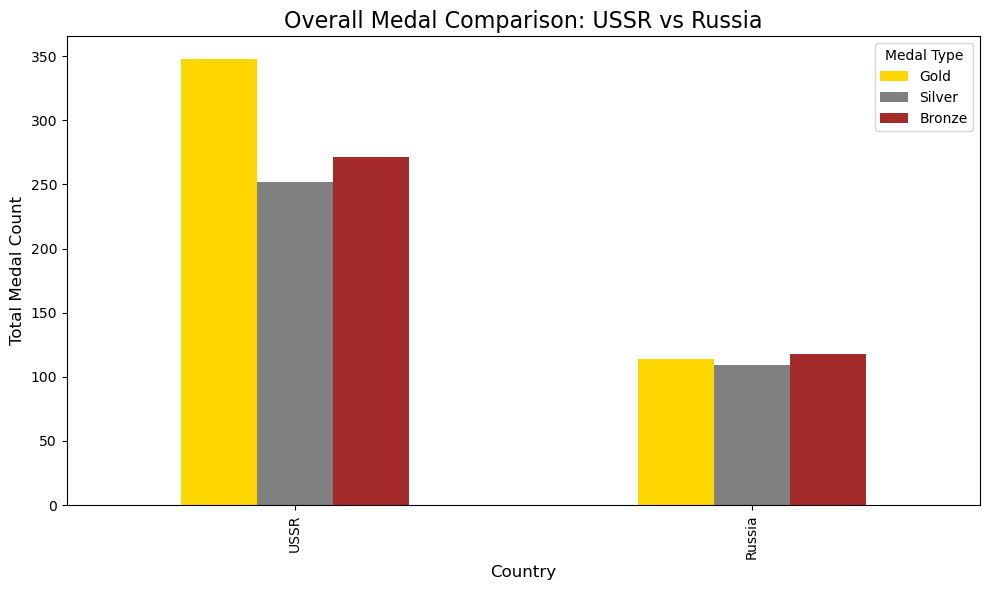

In [256]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/Users/parsaadineh/Desktop/clean data base/data frame final work.csv')


# Overall medal comparison
ussr_total = ussr_data[['Gold Count', 'Silver Count', 'Bronze Count']].sum()
russia_total = russia_data[['Gold Count', 'Silver Count', 'Bronze Count']].sum()
overall_df = pd.DataFrame({
    'Country': ['USSR', 'Russia'],
    'Gold': [ussr_total['Gold Count'], russia_total['Gold Count']],
    'Silver': [ussr_total['Silver Count'], russia_total['Silver Count']],
    'Bronze': [ussr_total['Bronze Count'], russia_total['Bronze Count']]
})

# Plot overall comparison
overall_df.set_index('Country').plot(kind='bar', figsize=(10, 6), color=['gold', 'gray', 'brown'])
plt.title('Overall Medal Comparison: USSR vs Russia', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Medal Count', fontsize=12)
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()


In [316]:
import pandas as pd

# Read the dataset
file_path = '/Users/parsaadineh/Desktop/clean data base/data frame final work.csv'
df = pd.read_csv(file_path)


if 'Full_Name' in df.columns and 'NOC' in df.columns:
    # Filter for Russia and USSR
    russia_ussr_data = df[df['NOC'].isin(['RUS', 'URS'])]
    
    # Group by NOC and count players
    player_counts = russia_ussr_data.groupby('NOC')['Full_Name'].nunique().reset_index()
    player_counts.columns = ['NOC', 'Player Count']
    
    # Display the results
    print("Number of unique players for Russia and USSR:")
    print(player_counts)
else:
    print("The required columns ('Full_Name' and 'NOC') are missing in the dataset.")

Number of unique players for Russia and USSR:
   NOC  Player Count
0  RUS          2015
1  URS          2442


### This data shows that even though the USSR did not have significantly more players, they performed much better than Russia.

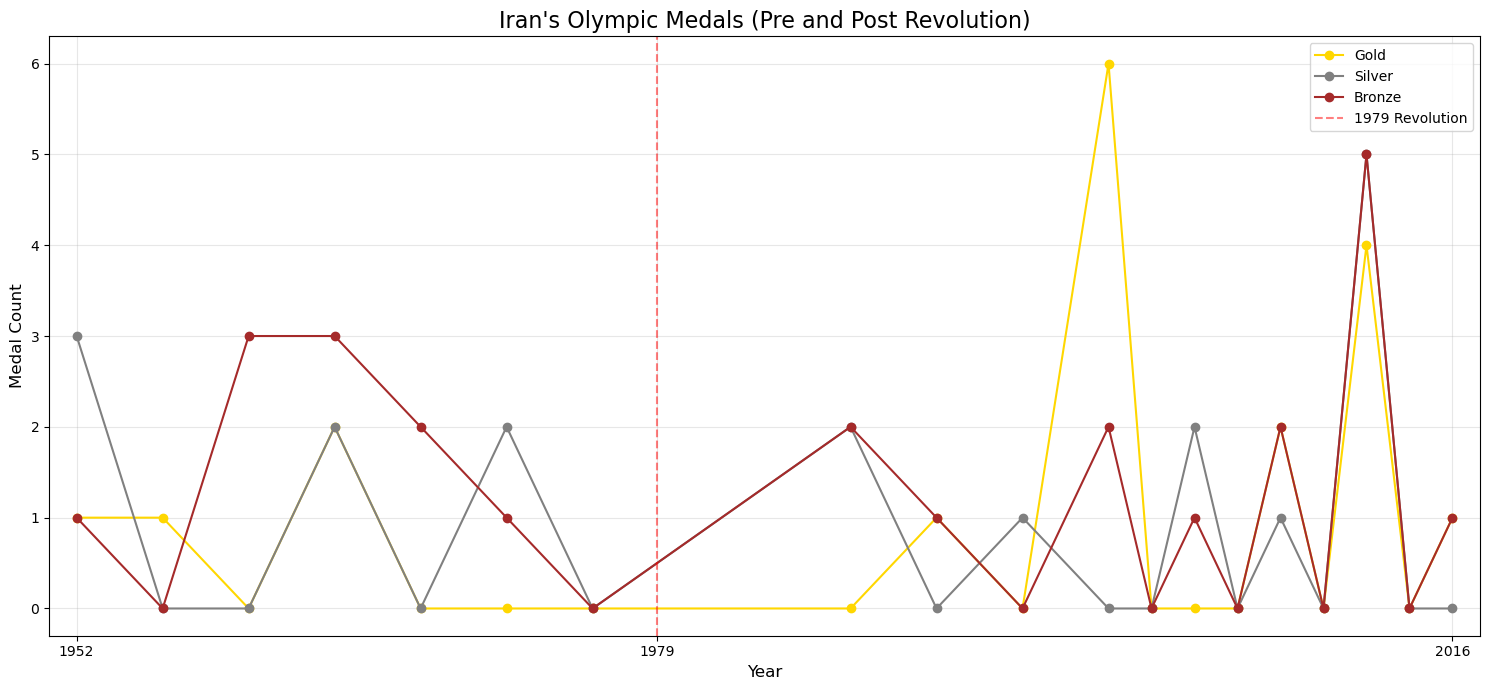

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/Users/parsaadineh/Desktop/clean data base/data frame final work.csv')

# Filter for Iran 
iran_data = df[df['Team'] == 'Iran'].copy()  

# Function to extract first year from potentially combined years
def get_first_year(year_str):
    return int(str(year_str).split(',')[0].strip())

# Apply the function 
iran_data.loc[:, 'Year'] = iran_data['Year'].apply(get_first_year)

def count_medals(appearances):
    if pd.isna(appearances):
        return 0, 0, 0
    medals = str(appearances).split(',')
    gold = sum(1 for medal in medals if medal.strip() == 'Gold')
    silver = sum(1 for medal in medals if medal.strip() == 'Silver')
    bronze = sum(1 for medal in medals if medal.strip() == 'Bronze')
    return gold, silver, bronze

# Create yearly medal counts
iran_yearly = pd.DataFrame()
iran_yearly['Year'] = iran_data['Year'].unique()
iran_yearly['Gold Count'] = 0
iran_yearly['Silver Count'] = 0
iran_yearly['Bronze Count'] = 0

# Fill in the medal counts
for index, row in iran_yearly.iterrows():
    year_data = iran_data[iran_data['Year'] == row['Year']]
    total_gold = 0
    total_silver = 0
    total_bronze = 0
    for _, athlete in year_data.iterrows():
        gold, silver, bronze = count_medals(athlete['Appearances'])
        total_gold += gold
        total_silver += silver
        total_bronze += bronze
    iran_yearly.at[index, 'Gold Count'] = total_gold
    iran_yearly.at[index, 'Silver Count'] = total_silver
    iran_yearly.at[index, 'Bronze Count'] = total_bronze

# Sort by year
iran_yearly = iran_yearly.sort_values('Year')

# Create the visualization
plt.figure(figsize=(15, 7))

# Pre-revolution and post-revolution trends
plt.plot(iran_yearly['Year'], iran_yearly['Gold Count'], label='Gold', color='gold', marker='o')
plt.plot(iran_yearly['Year'], iran_yearly['Silver Count'], label='Silver', color='gray', marker='o')
plt.plot(iran_yearly['Year'], iran_yearly['Bronze Count'], label='Bronze', color='brown', marker='o')

# Add vertical line for revolution year
plt.axvline(x=1979, color='red', linestyle='--', alpha=0.5, label='1979 Revolution')

# Title and labels
plt.title("Iran's Olympic Medals (Pre and Post Revolution)", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)

# Show specific years: first year, revolution year, and last year
first_year = int(iran_yearly['Year'].min())
last_year = int(iran_yearly['Year'].max())
plt.xticks([first_year, 1979, last_year], rotation=0)

# Add padding
plt.margins(x=0.02)

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()

plt.show()

### we see an increase in the number of Gold medals won post revelution  